## Basics of ANN: Lab 4
### Tasks:
* Plot the error
* Model XOR with the help of sigmoid and linear


In [129]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

k = 1
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-k*x))

def sigmoid_prime(x):
    return sigmoid(x)*(1.0-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - x**2

def linear(x):
    return x

def linear_prime(x):
    return 1


In [149]:
errors=[]
class NeuralNetwork:

    def __init__(self, layers, activation='linear'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_prime
        elif activation == 'linear':
            self.activation = linear
            self.activation_prime = linear_prime

        # Set weights
        self.weights = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
            print(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        print(r)
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
         
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # output layer
            error = y[i] - a[-1]
            errors.append(error)
            deltas = [error * self.activation_prime(a[-1])]

            # we need to begin at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))
                
            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

            if k % 10000 == 0: 
                print('epochs:', k)
        
    def predict(self, x): 
    
        a = np.concatenate((np.ones(1).T, np.array(x)))      

        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

if __name__ == '__main__':
    nn = NeuralNetwork([2,2,1])
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0]).T
#     X = np.array([[-1, -1],
#                   [-1, 1],
#                   [1, -1],
#                   [1, 1]])
#     y = np.array([0, 1, 1, 0])

    nn.fit(X, y)
    for e in X:
        print(e, nn.predict(e))

[[-0.85250518  0.26379979 -0.98436181]
 [ 0.10228739  0.17210621  0.96893017]
 [-0.35557217  0.36203586  0.31405174]]
[[ 0.26556431]
 [-0.08977817]
 [-0.81387002]]
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
[0 0] [0.41110468]
[0 1] [0.48985019]
[1 0] [0.26784637]
[1 1] [0.34659189]


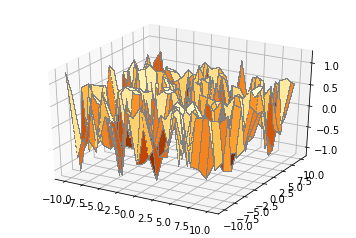

In [151]:
synapse_0 = np.empty((2,1))

# the error aggregation starts here
x_range = np.linspace(-10, 10, 20, dtype=np.float)
y_range = np.linspace(-10, 10, 20, dtype=np.float)

# in order to plot we need to transform x,y and z in 2D array 
error_surface = np.reshape(np.array(errors[0:400]), (x_range.shape[0], y_range.shape[0]))
_X, _Y = np.meshgrid(x_range, y_range, indexing='ij')

# plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(_X, _Y, error_surface, cmap=cm.YlOrBr_r, edgecolor='gray', linewidth=0.004, antialiased=False)
plt.show()

In [152]:
errors

[array([1.22580657]),
 array([0.7050107]),
 array([-1.16036309]),
 array([0.73849458]),
 array([-0.83286877]),
 array([0.6926809]),
 array([-0.73581314]),
 array([-0.41869551]),
 array([-0.00494659]),
 array([0.92742892]),
 array([0.76118183]),
 array([-0.63100979]),
 array([0.63355209]),
 array([0.58136394]),
 array([-0.68254627]),
 array([0.66509178]),
 array([0.26947555]),
 array([0.10743807]),
 array([-0.90244282]),
 array([0.47244663]),
 array([-0.68172733]),
 array([-0.37740846]),
 array([-0.312696]),
 array([0.84988615]),
 array([-0.37617475]),
 array([0.70746078]),
 array([0.61859776]),
 array([-0.65529665]),
 array([-0.47459232]),
 array([-0.27396064]),
 array([-0.18764872]),
 array([-0.13030475]),
 array([-0.0910674]),
 array([0.88928943]),
 array([-0.34931818]),
 array([-0.33822116]),
 array([0.84383568]),
 array([-0.38907291]),
 array([-0.23422215]),
 array([0.77644077]),
 array([-0.4437958]),
 array([-0.30652552]),
 array([0.71584106]),
 array([0.44431873]),
 array([-0.598

In [153]:
error_surface.shape

(20, 20)

In [154]:
error_surface[0:20,0:20]

array([[ 1.22580657,  0.7050107 , -1.16036309,  0.73849458, -0.83286877,
         0.6926809 , -0.73581314, -0.41869551, -0.00494659,  0.92742892,
         0.76118183, -0.63100979,  0.63355209,  0.58136394, -0.68254627,
         0.66509178,  0.26947555,  0.10743807, -0.90244282,  0.47244663],
       [-0.68172733, -0.37740846, -0.312696  ,  0.84988615, -0.37617475,
         0.70746078,  0.61859776, -0.65529665, -0.47459232, -0.27396064,
        -0.18764872, -0.13030475, -0.0910674 ,  0.88928943, -0.34931818,
        -0.33822116,  0.84383568, -0.38907291, -0.23422215,  0.77644077],
       [-0.4437958 , -0.30652552,  0.71584106,  0.44431873, -0.59841133,
         0.73318955, -0.50146471, -0.32096987, -0.23468783, -0.36268214,
         0.8628963 , -0.37519156,  0.71585296, -0.33790257,  0.77633796,
         0.44320879,  0.25813234,  0.12948411, -0.6680611 , -0.63014692],
       [ 0.77689848, -0.54471899,  0.58223456,  0.37664752, -0.66306358,
        -0.43927999,  0.57117939, -0.47407068, -

In [155]:
x_range.shape[0]

20

In [156]:
len(errors)

100000